This notebook is to extract density and mean temperature values from maps resulted from the DEM analysis

In [1]:
import warnings
warnings.simplefilter('ignore')

import glob
import datetime
import numpy as np
import pandas as pd
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as colors
from matplotlib.ticker import AutoMinorLocator
from sunpy.map import Map
import astropy.units as u
from astropy.io import fits as fits
from astropy.coordinates import SkyCoord
import os.path
script_path = os.path.abspath('./scripts')
from sys import path as sys_path
if script_path not in sys_path:
    sys_path.append(script_path)
from tqdm import tqdm

# set the directory path where the data is stored
data_dir = '/home/mnedal/data'

In [2]:
dens_files = sorted(glob.glob(f'{data_dir}/tornado_files/dens_dem_fits/*.fits'))
temp_files = sorted(glob.glob(f'{data_dir}/tornado_files/temp_dem_fits/*.fits'))
print(len(dens_files), len(dens_files))

558 558


In [6]:
datetimes = []
for file in dens_files:
    date_str = file.split('/')[-1][:-5].split('T')[0]
    time_str = file.split('/')[-1][:-5].split('T')[1]
    
    formatted_date = f'{date_str[:4]}-{date_str[4:6]}-{date_str[6:]}'
    formatted_time = f'{time_str[:2]}:{time_str[2:4]}:{time_str[4:]}'
    
    datetimes.append(f'{formatted_date} {formatted_time}')

In [7]:
len(datetimes)

558

In [8]:
# The datetime string you want to find
search_datetime = '2024-05-14 17:36:00'
# search_datetime = '2024-05-14 17:40:00'

try:
    # Get the index of the datetime string
    index = datetimes.index(search_datetime)
    print(f'The index of {search_datetime} is: {index}')
except ValueError:
    print(f'{search_datetime} not found in the list!\nFind the nearest one ..')
    # Convert the list of datetime strings to datetime objects
    datetime_objects = [datetime.datetime.strptime(dt, '%Y-%m-%d %H:%M:%S') for dt in datetimes]
    # Convert the search string to a datetime object
    search_dt = datetime.datetime.strptime(search_datetime, '%Y-%m-%d %H:%M:%S')
    # Find the nearest datetime by calculating the minimum difference
    nearest_dt = min(datetime_objects, key=lambda dt: abs(dt - search_dt))
    # Find the index of the nearest datetime
    index = datetime_objects.index(nearest_dt)
    print(f'The index of {search_datetime} is: {index}')

2024-05-14 17:36:00 not found in the list!
Find the nearest one ..
The index of 2024-05-14 17:36:00 is: 138


In [9]:
# Extract the value at the specified point
point_coord = SkyCoord(-867 * u.arcsec, 405 * u.arcsec, frame=dens_map.coordinate_frame)
x_pixel, y_pixel = dens_map.wcs.world_to_pixel(point_coord)

# Extract the value at the calculated pixel coordinates
density = dens_map.data[int(y_pixel), int(x_pixel)]
print(f'{density:.2e}')

fig = plt.figure(figsize=[6,8])
dens_map = Map(dens_files[index])
ax = fig.add_subplot(projection=dens_map)
img = dens_map.plot(axes=ax,
             norm=colors.LogNorm(vmin=4e5, vmax=1e7),
             cmap='gist_ncar') 
plt.colorbar(img, fraction=0.065, pad=0.02, label=r'Density [cm$^{-3}$]')
ax.grid(False)
ax.set_title(datetimes[index])
# Mark the point on the map
ax.plot(x_pixel, y_pixel, 'ko')
ax.text(x_pixel + 3, y_pixel + 3, '(a)', color='k', fontsize=14, weight='bold')
fig.tight_layout()
plt.show()

NameError: name 'dens_map' is not defined

In [10]:
n_points = {
    'n1': [-883*u.arcsec, 345*u.arcsec],
    'n2': [-890*u.arcsec, 380*u.arcsec],
    'n3': [-864*u.arcsec, 372*u.arcsec],
    'n4': [-867*u.arcsec, 405*u.arcsec]
}

T_points = {
    'T1': [-883*u.arcsec, 345*u.arcsec],
    'T2': [-890*u.arcsec, 380*u.arcsec],
    'T3': [-864*u.arcsec, 372*u.arcsec],
    'T4': [-867*u.arcsec, 405*u.arcsec]
}

# Extract the value at the specified point
# Extract the value at the calculated pixel coordinates
# Mark the point on the map
# densities, temperatures = [], []
# for point in points:
#     point_d_coord = SkyCoord(points[point][0], points[point][1], frame=dens_map.coordinate_frame)
#     xd_pixel, yd_pixel = dens_map.wcs.world_to_pixel(point_d_coord)
#     density = dens_map.data[int(yd_pixel), int(xd_pixel)]
#     densities.append(density)
    
#     point_t_coord = SkyCoord(points[point][0], points[point][1], frame=temp_map.coordinate_frame)
#     xt_pixel, yt_pixel = temp_map.wcs.world_to_pixel(point_t_coord)
#     temperature = temp_map.data[int(yt_pixel), int(xt_pixel)]
#     temperatures.append(temperature)

Frame time: 2024-05-14 17:36:01


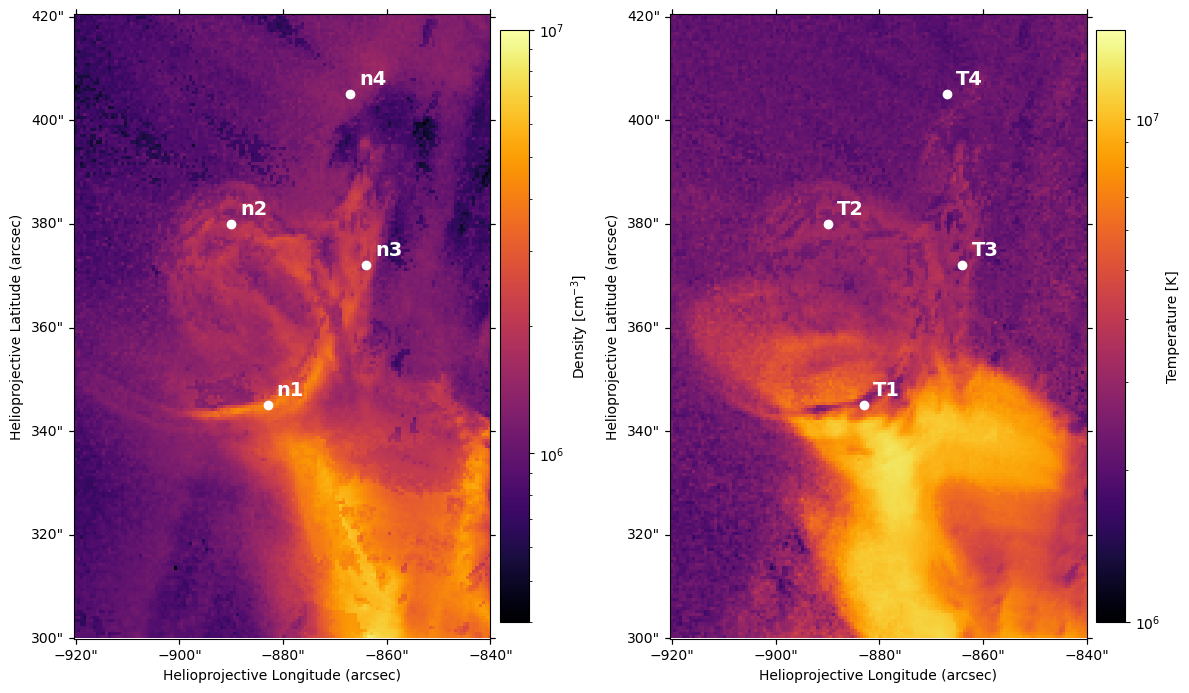

In [11]:
print(f'Frame time: {datetimes[index]}')

fig = plt.figure(figsize=[12,8])

dens_map = Map(dens_files[index])
ax = fig.add_subplot(121, projection=dens_map)
img = dens_map.plot(axes=ax,
             norm=colors.LogNorm(vmin=4e5, vmax=1e7),
             cmap='inferno')
plt.colorbar(img, fraction=0.065, pad=0.02, label=r'Density [cm$^{-3}$]')
ax.grid(False)
# ax.set_title(datetimes[index])
ax.set_title('')
ax.set_xlabel('Helioprojective Longitude (arcsec)')
ax.set_ylabel('Helioprojective Latitude (arcsec)')

for n_point in n_points:
    point_d_coord = SkyCoord(n_points[n_point][0], n_points[n_point][1], frame=dens_map.coordinate_frame)
    xd_pixel, yd_pixel = dens_map.wcs.world_to_pixel(point_d_coord)
    # density = dens_map.data[int(yd_pixel), int(xd_pixel)]
    # densities[point].append(density)
    ax.plot(xd_pixel, yd_pixel, 'wo')
    ax.text(xd_pixel+3, yd_pixel+3, n_point, color='w', fontsize=14, weight='bold')

temp_map = Map(temp_files[index])
ax = fig.add_subplot(122, projection=temp_map)
img = temp_map.plot(axes=ax,
                    norm=colors.LogNorm(vmin=1e6, vmax=1.5e7),
                    cmap='inferno')
plt.colorbar(img, fraction=0.065, pad=0.02, label='Temperature [K]')
ax.grid(False)
# ax.set_title(datetimes[index])
ax.set_title('')
ax.set_xlabel('Helioprojective Longitude (arcsec)')
ax.set_ylabel('Helioprojective Latitude (arcsec)')

for T_point in T_points:
    point_t_coord = SkyCoord(T_points[T_point][0], T_points[T_point][1], frame=temp_map.coordinate_frame)
    xt_pixel, yt_pixel = temp_map.wcs.world_to_pixel(point_t_coord)
    # temperature = temp_map.data[int(yt_pixel), int(xt_pixel)]
    # temperatures[point].append(temperature)
    ax.plot(xt_pixel, yt_pixel, 'wo')
    ax.text(xt_pixel+3, yt_pixel+3, T_point, color='w', fontsize=14, weight='bold')
    
fig.tight_layout()
fig.savefig(f'{data_dir}/dens_temp_maps_tornado.pdf', format='pdf', bbox_inches='tight')
plt.show()

### Extract densities from all frames at the four points

In [12]:
densities = {'n1':[], 'n2':[], 'n3':[], 'n4':[]}

with tqdm(total=len(dens_files), desc='Extract densities ...') as pbar:
    for file in dens_files:
        dens_map = Map(file)
        for n_point in n_points:
            point_d_coord = SkyCoord(n_points[n_point][0], n_points[n_point][1], frame=dens_map.coordinate_frame)
            xd_pixel, yd_pixel = dens_map.wcs.world_to_pixel(point_d_coord)
            density = dens_map.data[int(yd_pixel), int(xd_pixel)]
            densities[n_point].append(density)
        pbar.update(1)

Extract densities ...: 100%|████████████████████████████████████████| 558/558 [01:26<00:00,  6.45it/s]


In [13]:
temperatures = {'T1':[], 'T2':[], 'T3':[], 'T4':[]}

with tqdm(total=len(temp_files), desc='Extract temperatures ...') as pbar:
    for file in temp_files:
        temp_map = Map(file)
        for T_point in T_points:
            point_t_coord = SkyCoord(T_points[T_point][0], T_points[T_point][1], frame=temp_map.coordinate_frame)
            xt_pixel, yt_pixel = temp_map.wcs.world_to_pixel(point_t_coord)
            temperature = temp_map.data[int(yt_pixel), int(xt_pixel)]
            temperatures[T_point].append(temperature)
        pbar.update(1)

Extract temperatures ...: 100%|█████████████████████████████████████| 558/558 [01:25<00:00,  6.50it/s]


In [14]:
datetime_objects = [datetime.datetime.strptime(dt, '%Y-%m-%d %H:%M:%S') for dt in datetimes]

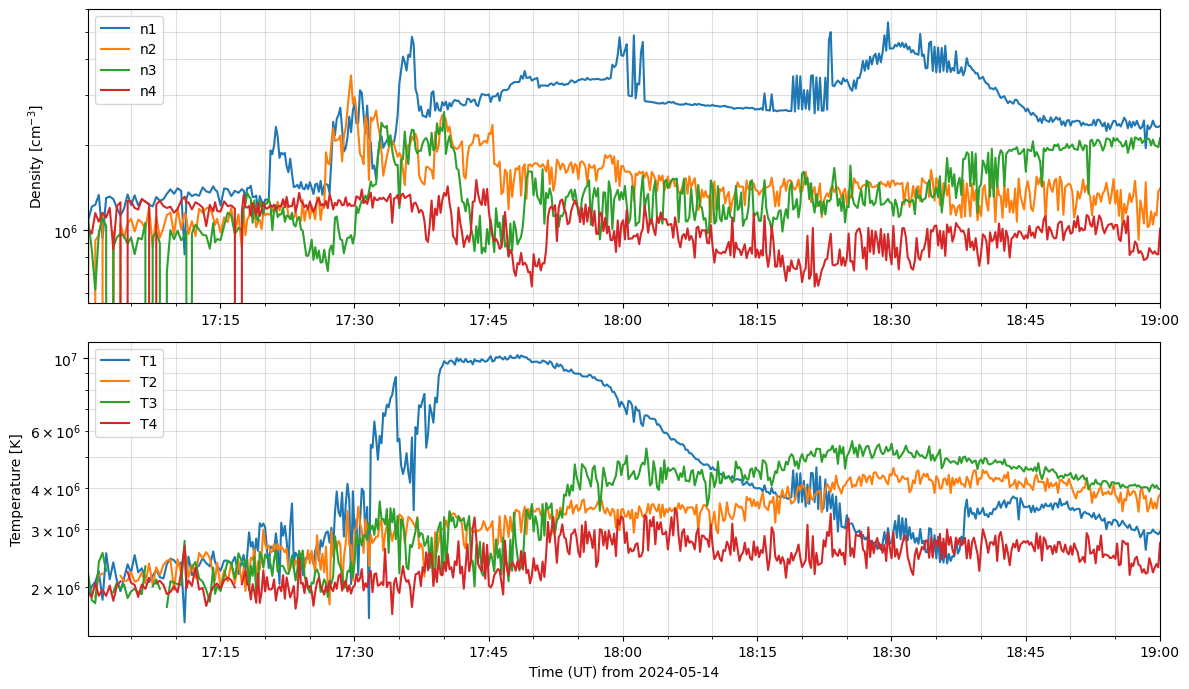

In [15]:
# Define different line styles
# line_styles = ['-', '--', '-.', ':']  # Solid, dashed, dash-dot, and dotted

fig = plt.figure(figsize=[12,7])

# Loop over densities and line styles
ax = fig.add_subplot(211)
for i, point in enumerate(densities):
    ax.plot(datetime_objects, densities[point], label=point)
    # ax.plot(datetime_objects, densities[point], label=point, linestyle=line_styles[i % len(line_styles)])
ax.set_yscale('log')
ax.legend(loc='upper left')
ax.set_ylabel(r'Density [cm$^{-3}$]')
ax.xaxis.set_minor_locator(AutoMinorLocator(n=3))
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlim(left=datetime_objects[0], right=datetime_objects[-1])
ax.grid(which='both', alpha=0.4)

# Loop over temp and line styles
ax = fig.add_subplot(212)
for i, point in enumerate(temperatures):
    ax.plot(datetime_objects, temperatures[point], label=point)
ax.set_yscale('log')
ax.legend(loc='upper left')
ax.set_ylabel('Temperature [K]')
ax.xaxis.set_minor_locator(AutoMinorLocator(n=3))
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlim(left=datetime_objects[0], right=datetime_objects[-1])
ax.set_xlabel(f"Time (UT) from {str(dens_map.date).split('T')[0]}")
ax.grid(which='both', alpha=0.4)

fig.tight_layout()
fig.savefig(f'{data_dir}/dens_temp_tornado.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [16]:
print('Density')
for point in densities:
    dens = densities[point]
    nmax = np.nanmax(dens)
    navg = np.nanmean(dens)
    # Filter out zero values and calculate minimum non-zero density
    dens = np.array(dens)
    non_zero_dens = dens[dens > 0]
    # nmin = np.nanmin(dens)
    nmin = np.nanmin(non_zero_dens) if non_zero_dens.size > 0 else np.nan
    print(point)
    print(f'Nmax = {nmax:.2e}')
    print(f'Navg = {navg:.2e}')
    print(f'Nmin = {nmin:.2e}\n')

print('\nTemperature')
for point in temperatures:
    temp = temperatures[point]
    tmax = np.nanmax(temp)
    tavg = np.nanmean(temp)
    tmin = np.nanmin(temp)
    print(point)
    print(f'Tmax = {tmax:.2e}')
    print(f'Tavg = {tavg:.2e}')
    print(f'Tmin = {tmin:.2e}\n')

Density
n1
Nmax = 5.40e+06
Navg = 2.77e+06
Nmin = 8.19e+05

n2
Nmax = 3.51e+06
Navg = 1.47e+06
Nmin = 8.62e+05

n3
Nmax = 2.61e+06
Navg = 1.38e+06
Nmin = 6.15e+05

n4
Nmax = 1.50e+06
Navg = 1.01e+06
Nmin = 6.31e+05


Temperature
T1
Tmax = 1.02e+07
Tavg = 4.74e+06
Tmin = 1.56e+06

T2
Tmax = 4.61e+06
Tavg = 3.40e+06
Tmin = 1.77e+06

T3
Tmax = 5.57e+06
Tavg = 3.78e+06
Tmin = 1.74e+06

T4
Tmax = 3.46e+06
Tavg = 2.46e+06
Tmin = 1.65e+06



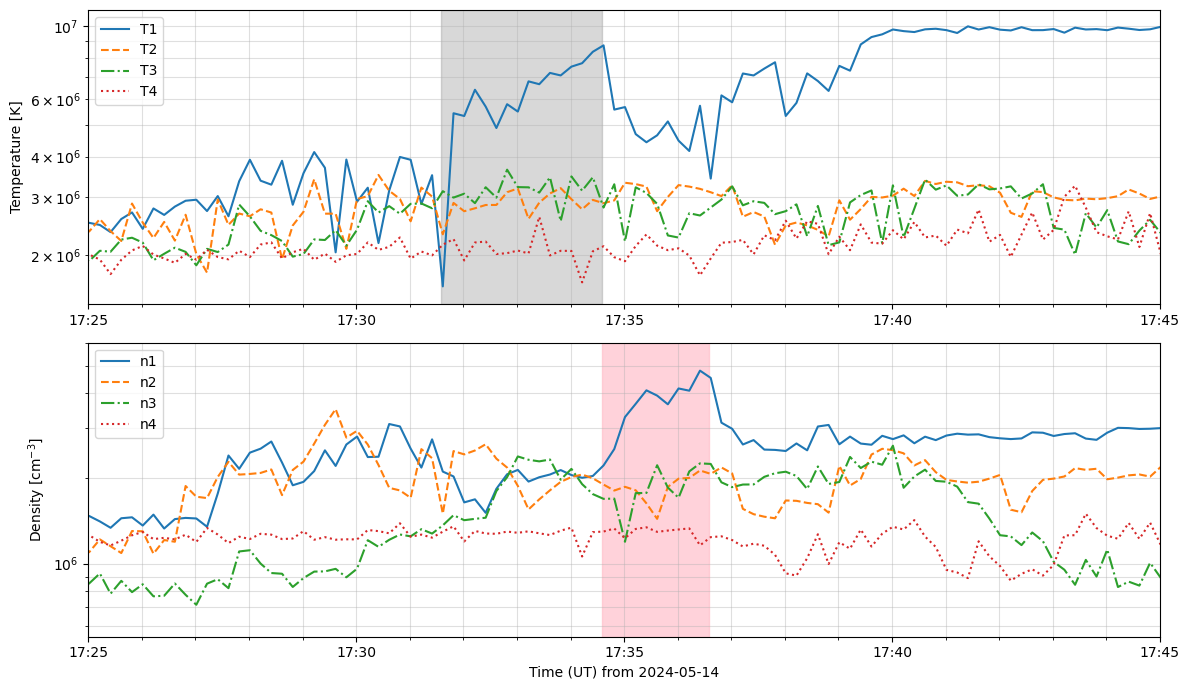

In [17]:
line_styles = ['-', '--', '-.', ':']  # Solid, dashed, dash-dot, and dotted

fig = plt.figure(figsize=[12,7])

# Loop over temp and line styles
ax = fig.add_subplot(211)
for i, point in enumerate(temperatures):
    ax.plot(datetime_objects, temperatures[point], ls=line_styles[i], label=point)
ax.set_yscale('log')
ax.legend(loc='upper left')
ax.set_ylabel('Temperature [K]')
ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlim(left=pd.Timestamp('2024-05-14T17:25'), right=pd.Timestamp('2024-05-14T17:45'))
ax.grid(which='both', alpha=0.4)
time1 = pd.Timestamp('2024-05-14T17:31:35')
time2 = pd.Timestamp('2024-05-14T17:34:35')
ax.axvspan(time1, time2, color='gray', alpha=0.3)

# Loop over densities and line styles
ax = fig.add_subplot(212)
for i, point in enumerate(densities):
    ax.plot(datetime_objects, densities[point], ls=line_styles[i], label=point)
ax.set_yscale('log')
ax.legend(loc='upper left')
ax.set_ylabel(r'Density [cm$^{-3}$]')
ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlim(left=pd.Timestamp('2024-05-14T17:25'), right=pd.Timestamp('2024-05-14T17:45'))
ax.grid(which='both', alpha=0.4)
time1 = pd.Timestamp('2024-05-14T17:34:35')
time2 = pd.Timestamp('2024-05-14T17:36:35')
ax.axvspan(time1, time2, color='pink', alpha=0.7)
ax.set_xlabel(f"Time (UT) from {str(dens_map.date).split('T')[0]}")

fig.tight_layout()
plt.show()

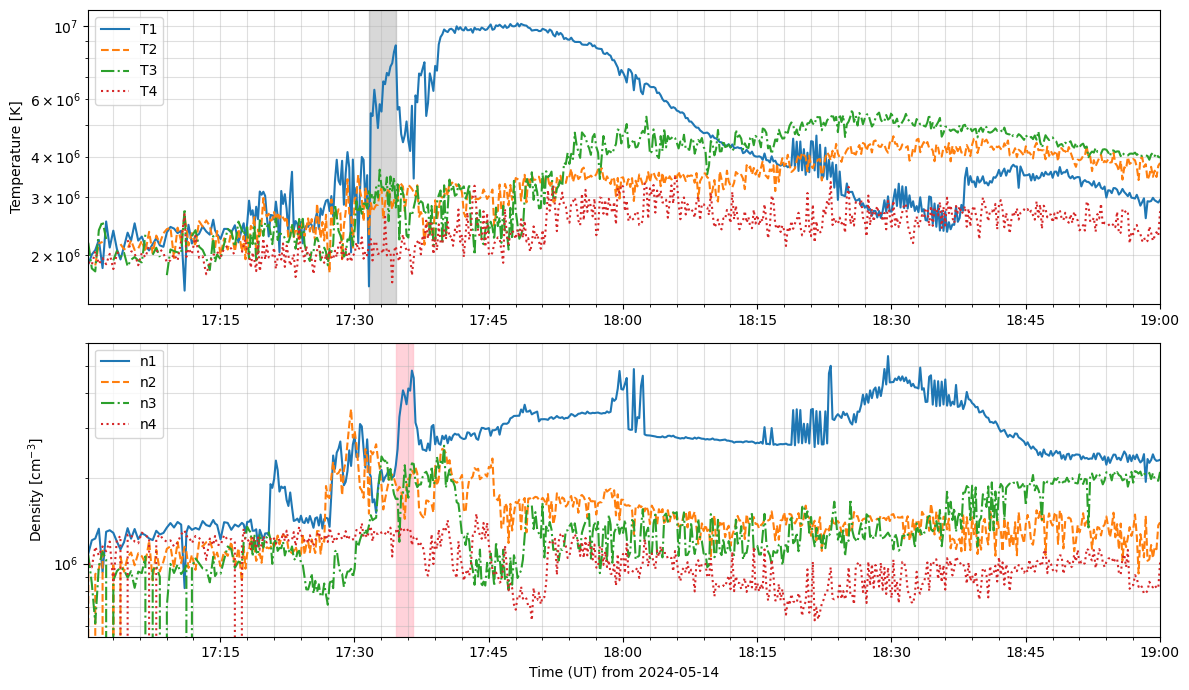

In [18]:
left_bound  = '2024-05-14T17:15'
right_bound = '2024-05-14T19:00'
full_range  = True

line_styles = ['-', '--', '-.', ':']  # Solid, dashed, dash-dot, and dotted

fig = plt.figure(figsize=[12,7])

# Loop over temp and line styles
ax = fig.add_subplot(211)
for i, point in enumerate(temperatures):
    ax.plot(datetime_objects, temperatures[point], ls=line_styles[i], label=point)
ax.set_yscale('log')
ax.legend(loc='upper left')
ax.set_ylabel('Temperature [K]')
ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
if full_range:
    ax.set_xlim(left=datetime_objects[0], right=datetime_objects[-1])
else:
    ax.set_xlim(left=pd.Timestamp(left_bound), right=pd.Timestamp(right_bound))
ax.grid(which='both', alpha=0.4)
time1 = pd.Timestamp('2024-05-14T17:31:35')
time2 = pd.Timestamp('2024-05-14T17:34:35')
ax.axvspan(time1, time2, color='gray', alpha=0.3)

# Loop over densities and line styles
ax = fig.add_subplot(212)
for i, point in enumerate(densities):
    ax.plot(datetime_objects, densities[point], ls=line_styles[i], label=point)
ax.set_yscale('log')
ax.legend(loc='upper left')
ax.set_ylabel(r'Density [cm$^{-3}$]')
ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
if full_range:
    ax.set_xlim(left=datetime_objects[0], right=datetime_objects[-1])
else:
    ax.set_xlim(left=pd.Timestamp(left_bound), right=pd.Timestamp(right_bound))
ax.grid(which='both', alpha=0.4)
time1 = pd.Timestamp('2024-05-14T17:34:35')
time2 = pd.Timestamp('2024-05-14T17:36:35')
ax.axvspan(time1, time2, color='pink', alpha=0.7)
ax.set_xlabel(f"Time (UT) from {str(dens_map.date).split('T')[0]}")

fig.tight_layout()
fig.savefig(f'{data_dir}/dens_temp_tornado.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [19]:
datetime_objects[0], datetime_objects[-1]

(datetime.datetime(2024, 5, 14, 17, 0, 15),
 datetime.datetime(2024, 5, 14, 19, 0, 1))

## Calculate the GOES-XRS temperature and emission measure (EM)

In [25]:
from sunpy import timeseries as ts
from sunpy.net import Fido, attrs as a
from sunkit_instruments import goes_xrs
from matplotlib.dates import DateFormatter
from matplotlib.ticker import AutoMinorLocator

In [30]:
date = '2024-05-14'
year, month, day = date.split('-')

goes_result = Fido.search(a.Time(date, date), a.Instrument('XRS'), a.goes.SatelliteNumber(16))
goes_file   = Fido.fetch(goes_result, path=f'{data_dir}/XRS/')
goes        = ts.TimeSeries(goes_file)

start_time = datetime_objects[0]
end_time   = datetime_objects[-1]

goes_flare   = goes[0].truncate(start_time, end_time)
goes_temp_em = goes_xrs.calculate_temperature_em(goes_flare)

df_goes         = goes[0].to_dataframe()
df_flare        = goes_flare.to_dataframe()
df_goes_temp_em = goes_temp_em.to_dataframe()

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

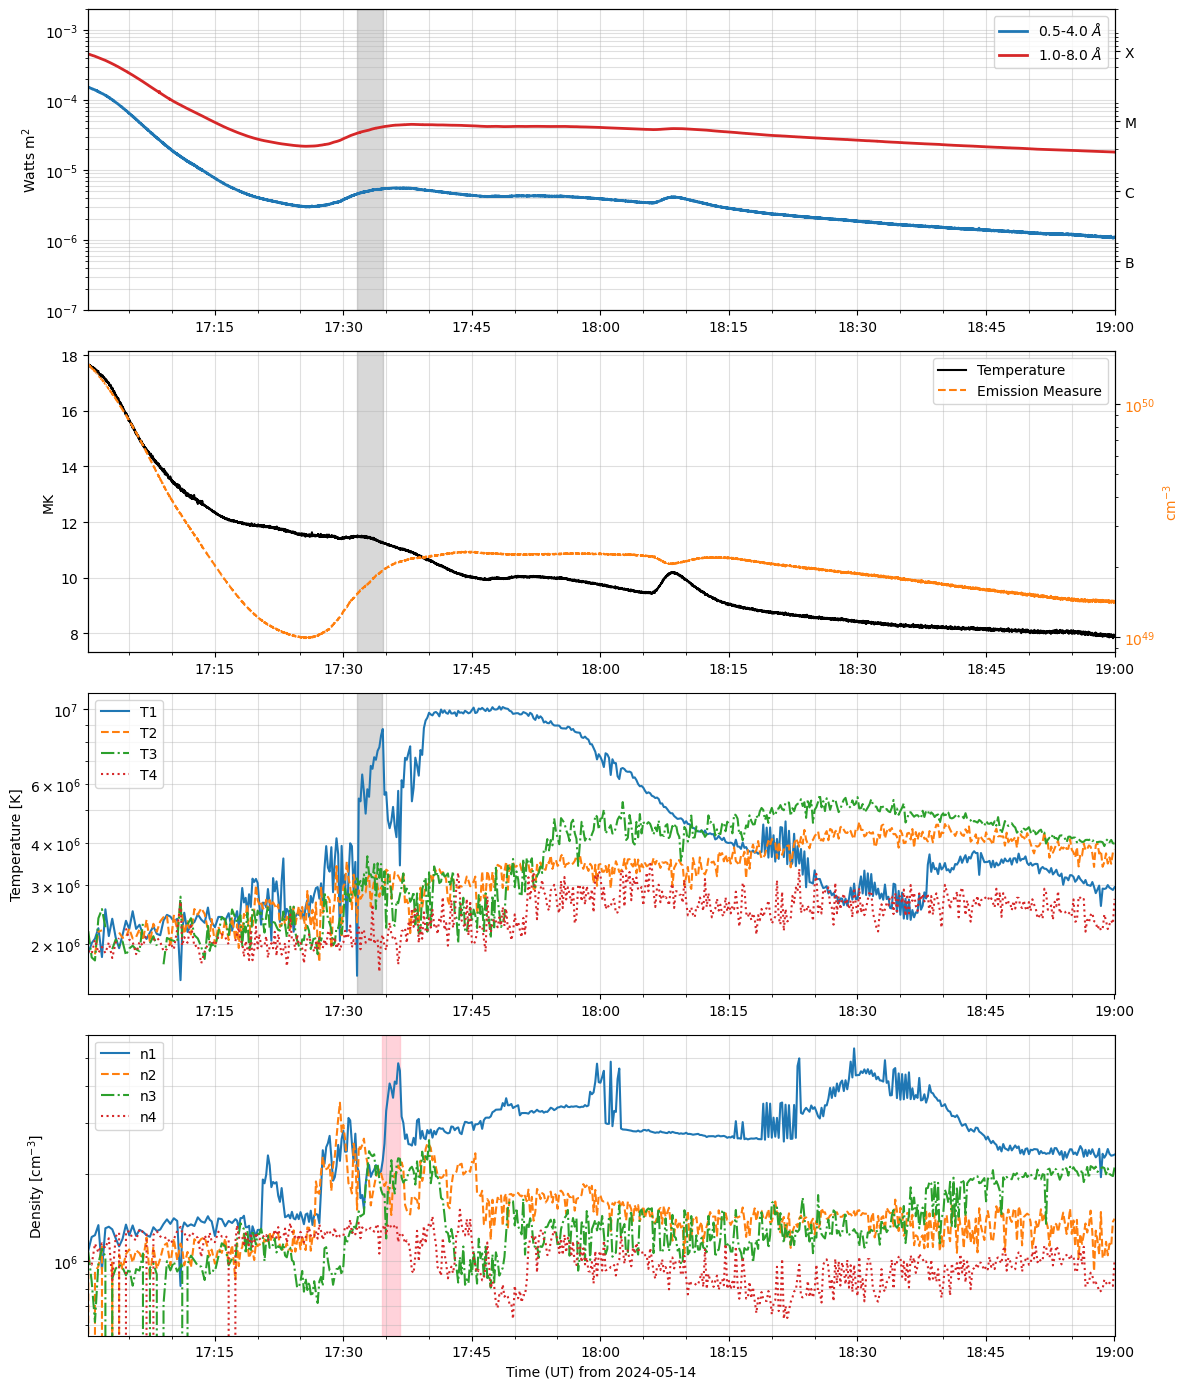

In [35]:
fig = plt.figure(figsize=[12,14])

ax = fig.add_subplot(411)
ax.plot(df_flare['xrsa'], color='tab:blue', lw=2, label=r'0.5-4.0 $\AA$')
ax.plot(df_flare['xrsb'], color='tab:red', lw=2, label=r'1.0-8.0 $\AA$')
ax.set_yscale('log')
ax.grid(alpha=0.4, which='both')
ax.legend(loc='upper right')
ax.xaxis.set_minor_locator(AutoMinorLocator(n=3))
ax.xaxis_date()
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.set_xlim(left=df_flare.index[0], right=df_flare.index[-1])
ax.set_ylim(bottom=1e-7, top=2e-3)
# Set custom ticks at flux levels corresponding to C, M, and X classes
flare_levels = [0.5e-6, 0.5e-5, 0.5e-4, 0.5e-3]  # Flux values for C, M, and X classes
flare_labels = ['B', 'C', 'M', 'X']     # Labels for the desired classes
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())  # Align the right y-axis with the left y-axis
ax2.set_yscale('log')        # Ensure both y-axes have the same scale
# Set custom ticks and labels for flare classes on the right y-axis
ax2.set_yticks(flare_levels)
ax2.set_yticklabels(flare_labels, color='black')
ax.set_ylabel(r'Watts m$^2$')
ax.axvspan(time1, time2, color='gray', alpha=0.3)

ax = fig.add_subplot(412)
line1, = ax.plot(df_goes_temp_em['temperature'], 'k-', label='Temperature')
ax.set_ylabel('MK')
ax.grid(alpha=0.4, which='both')
ax.xaxis.set_minor_locator(AutoMinorLocator(n=3))
ax.xaxis_date()
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.set_xlim(left=df_goes_temp_em.index[0], right=df_goes_temp_em.index[-1])
# Make the right y-axis and plot the second curve
ax2 = ax.twinx()
line2, = ax2.plot(df_goes_temp_em['emission_measure'], color='tab:orange', ls='--', label=r'Emission Measure')
ax2.set_ylabel(r'cm$^{-3}$', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.set_yscale('log')
# Combine legends from both axes
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax.legend(lines, labels, loc='upper right')
ax.axvspan(time1, time2, color='gray', alpha=0.3)

# Loop over temp and line styles
ax = fig.add_subplot(413)
for i, point in enumerate(temperatures):
    ax.plot(datetime_objects, temperatures[point], ls=line_styles[i], label=point)
ax.set_yscale('log')
ax.legend(loc='upper left')
ax.set_ylabel('Temperature [K]')
ax.xaxis.set_minor_locator(AutoMinorLocator(n=3))
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
if full_range:
    ax.set_xlim(left=datetime_objects[0], right=datetime_objects[-1])
else:
    ax.set_xlim(left=pd.Timestamp(left_bound), right=pd.Timestamp(right_bound))
ax.grid(which='both', alpha=0.4)
ax.axvspan(time1, time2, color='gray', alpha=0.3)

# Loop over densities and line styles
ax = fig.add_subplot(414)
for i, point in enumerate(densities):
    ax.plot(datetime_objects, densities[point], ls=line_styles[i], label=point)
ax.set_yscale('log')
ax.legend(loc='upper left')
ax.set_ylabel(r'Density [cm$^{-3}$]')
ax.xaxis.set_minor_locator(AutoMinorLocator(n=3))
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
if full_range:
    ax.set_xlim(left=datetime_objects[0], right=datetime_objects[-1])
else:
    ax.set_xlim(left=pd.Timestamp(left_bound), right=pd.Timestamp(right_bound))
ax.grid(which='both', alpha=0.4)
time1n = pd.Timestamp('2024-05-14T17:34:35')
time2n = pd.Timestamp('2024-05-14T17:36:35')
ax.axvspan(time1n, time2n, color='pink', alpha=0.7)
ax.set_xlabel(f"Time (UT) from {str(dens_map.date).split('T')[0]}")

fig.tight_layout()
fig.savefig(f'{data_dir}/goes_xr_EM_dens_temp.pdf', format='pdf', bbox_inches='tight')
fig.savefig(f'{data_dir}/png/goes_xr_EM_dens_temp.png', dpi=300, format='png', bbox_inches='tight')
plt.show()

## Rate of change

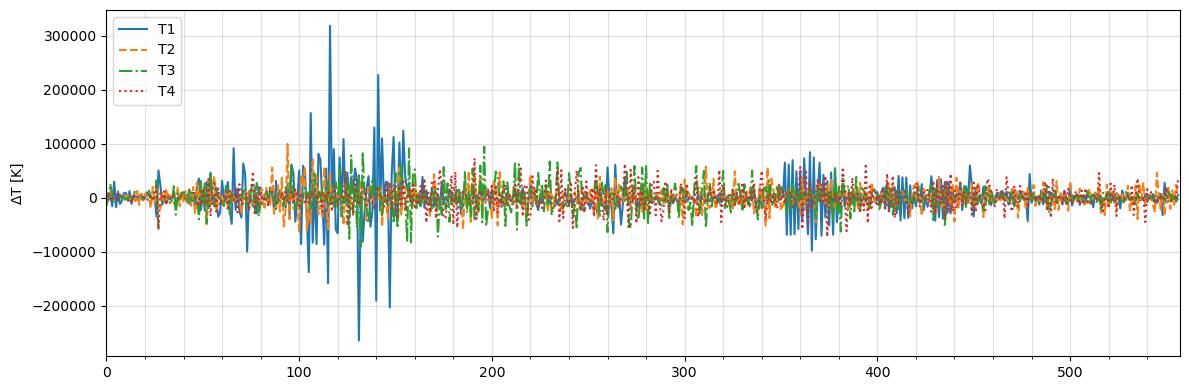

In [67]:
# Test ...
dt = [dt.total_seconds() for dt in np.diff(datetime_objects)]

fig = plt.figure(figsize=[12,4])
ax = fig.add_subplot(111)
for i, point in enumerate(temperatures):
    dT_dt = np.diff(temperatures[point]) / dt
    ax.plot(dT_dt, ls=line_styles[i], label=point)
# ax.set_yscale('log')
ax.legend(loc='upper left')
ax.set_ylabel(r'$\Delta$T [K]')
ax.grid(which='both', alpha=0.4)
ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
ax.set_xlim(left=0, right=len(dT_dt))
fig.tight_layout()
plt.show()

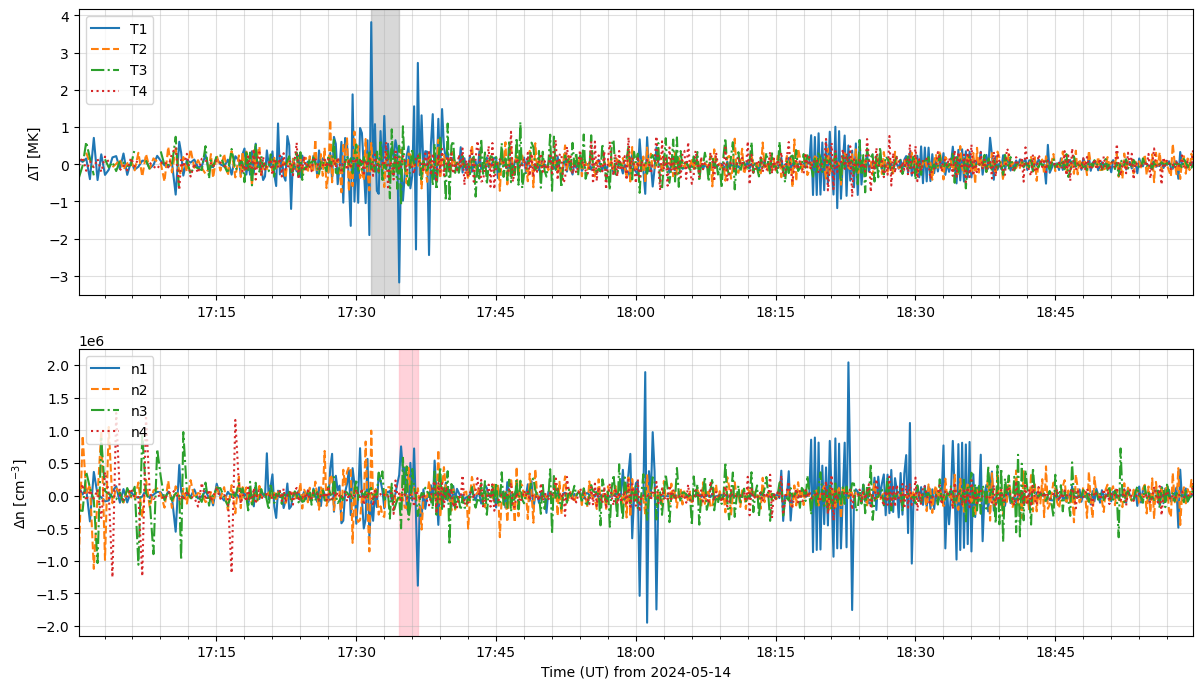

In [54]:
left_bound  = '2024-05-14T17:15'
right_bound = '2024-05-14T19:00'
full_range  = True

fig = plt.figure(figsize=[12,7])

# Loop over temp and line styles
ax = fig.add_subplot(211)
for i, point in enumerate(temperatures):
    dT = np.diff(temperatures[point])
    ax.plot(datetime_objects[:-1], dT/1e6, ls=line_styles[i], label=point)
# ax.set_yscale('log')
ax.legend(loc='upper left')
ax.set_ylabel(r'$\Delta$T [MK]')
ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
if full_range:
    ax.set_xlim(left=datetime_objects[:-1][0], right=datetime_objects[:-1][-1])
else:
    ax.set_xlim(left=pd.Timestamp(left_bound), right=pd.Timestamp(right_bound))
ax.grid(which='both', alpha=0.4)
time1 = pd.Timestamp('2024-05-14T17:31:35')
time2 = pd.Timestamp('2024-05-14T17:34:35')
ax.axvspan(time1, time2, color='gray', alpha=0.3)

# Loop over densities and line styles
ax = fig.add_subplot(212)
for i, point in enumerate(densities):
    dn = np.diff(densities[point])
    ax.plot(datetime_objects[:-1], dn, ls=line_styles[i], label=point)
# ax.set_yscale('log')
ax.legend(loc='upper left')
ax.set_ylabel(r'$\Delta$n [cm$^{-3}$]')
ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
if full_range:
    ax.set_xlim(left=datetime_objects[:-1][0], right=datetime_objects[:-1][-1])
else:
    ax.set_xlim(left=pd.Timestamp(left_bound), right=pd.Timestamp(right_bound))
ax.grid(which='both', alpha=0.4)
time1 = pd.Timestamp('2024-05-14T17:34:35')
time2 = pd.Timestamp('2024-05-14T17:36:35')
ax.axvspan(time1, time2, color='pink', alpha=0.7)
ax.set_xlabel(f"Time (UT) from {str(dens_map.date).split('T')[0]}")

fig.tight_layout()
# fig.savefig(f'{data_dir}/dn_dT_tornado.pdf', format='pdf', bbox_inches='tight')
plt.show()

## Deducing physical parameters

### Plasma-$\beta$ parameter of the corona

In [109]:
import scipy.constants as const

print(const.m_p, const.unit('proton mass'))
print(const.m_e, const.unit('electron mass'))
print(const.Boltzmann, const.unit('Boltzmann constant'))

1.67262192369e-27 kg
9.1093837015e-31 kg
1.380649e-23 J K^-1


In [137]:
mp = const.m_p*u.kg
mp_g = mp.to(u.g)
mp_g

<Quantity 1.67262192e-24 g>

In [132]:
# import sunpy.sun.constants as const
# const.print_all()

In [111]:
kB = const.Boltzmann * u.J/u.K
kB

<Quantity 1.380649e-23 J / K>

In [188]:
k_erg = kB.to(u.erg/u.K)
k_erg

<Quantity 1.380649e-16 erg / K>

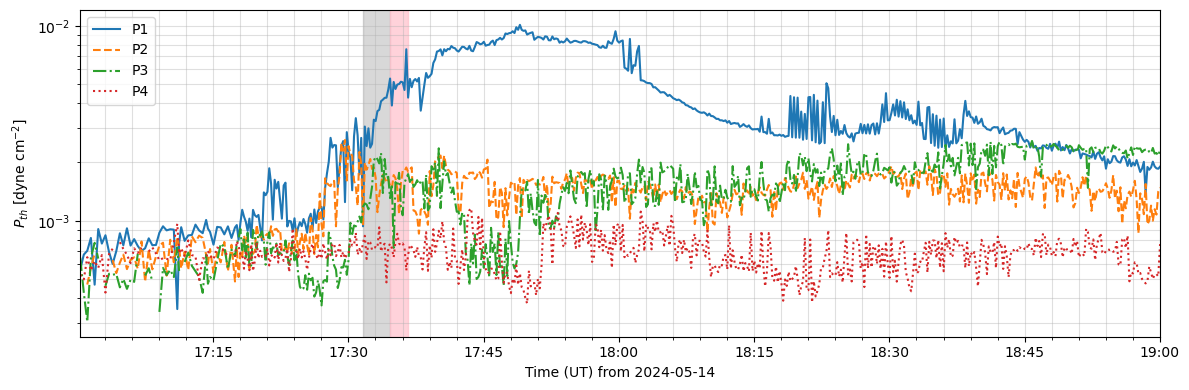

In [196]:
# Test ...
thermal_pressure = []

fig = plt.figure(figsize=[12,4])
ax = fig.add_subplot(111)

for i, (n_point, T_point) in enumerate(zip(densities, temperatures)):
    n = np.array(densities[n_point])
    T = np.array(temperatures[T_point])
    p_th = 2*n*k_erg.value*T
    thermal_pressure.append(p_th)
    ax.plot(datetime_objects, p_th, ls=line_styles[i], label=f'P{i+1}')
ax.set_yscale('log')
ax.legend(loc='upper left')
ax.set_ylabel(r'$P_{th}$ [dyne cm$^{-2}$]')
ax.grid(which='both', alpha=0.4)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
ax.set_xlim(left=datetime_objects[0], right=datetime_objects[-1])
ax.set_xlabel(f"Time (UT) from {str(dens_map.date).split('T')[0]}")

time1 = pd.Timestamp('2024-05-14T17:31:35')
time2 = pd.Timestamp('2024-05-14T17:34:35')
ax.axvspan(time1, time2, color='gray', alpha=0.3)

time1 = pd.Timestamp('2024-05-14T17:34:35')
time2 = pd.Timestamp('2024-05-14T17:36:35')
ax.axvspan(time1, time2, color='pink', alpha=0.7)

fig.tight_layout()
plt.show()

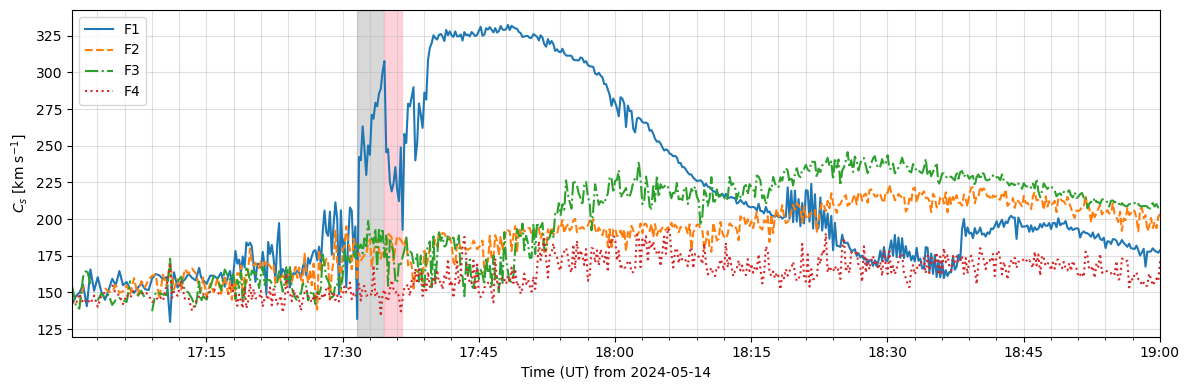

In [198]:
# Test ...

gamma = 5/3     # Adiabatic index
mu    = 1.27    # Mean molecular weight in the corona
sound_speed = []

fig = plt.figure(figsize=[12,4])
ax = fig.add_subplot(111)

for i, T_point in enumerate(temperatures):
    T = np.array(temperatures[T_point])
    C_s = np.sqrt((gamma * k_erg.value * T) / (mu * mp_g.value))  # cm/s
    C_s_kms = C_s / 1e5  # Convert to km/s
    sound_speed.append(C_s_kms)
    ax.plot(datetime_objects, C_s_kms, ls=line_styles[i], label=f'F{i+1}')
# ax.set_yscale('log')
ax.legend(loc='upper left')
ax.set_ylabel(r'$C_s$ [km s$^{-1}$]')
ax.grid(which='both', alpha=0.4)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
ax.set_xlim(left=datetime_objects[0], right=datetime_objects[-1])
ax.set_xlabel(f"Time (UT) from {str(dens_map.date).split('T')[0]}")

time1 = pd.Timestamp('2024-05-14T17:31:35')
time2 = pd.Timestamp('2024-05-14T17:34:35')
ax.axvspan(time1, time2, color='gray', alpha=0.3)

time1 = pd.Timestamp('2024-05-14T17:34:35')
time2 = pd.Timestamp('2024-05-14T17:36:35')
ax.axvspan(time1, time2, color='pink', alpha=0.7)

fig.tight_layout()
plt.show()

In [133]:
# # Constants
# k_B = 1.38e-16  # Boltzmann constant in erg/K
# m_p = 1.67e-24  # Proton mass in g
# gamma = 5/3     # Adiabatic index
# mu = 1.27        # mean molecular weight int he corona

# # 1. Sound Speed
# C_s = np.sqrt((gamma * k_B * temperature_K) / (mu * m_p))  # cm/s
# C_s_kms = C_s / 1e5  # Convert to km/s
# print(f"Sound Speed: {C_s_kms:.2f} km/s")


# # 2. Magnetic field (G)
# B = v_obs * np.sqrt(4 * pi * n_initial * m_p)
# print(f"Magnetic field: {B:.2f} G")


# # 5. Rate of energy transfer (erg/cm^3/s)
# Q = n_initial * m_p * c_s**3
# print(f"Rate of energy transfer: {Q:.2e} erg/cm^3/s")


# # 5. Rate of Energy Transfer
# dE = density_cm3 * k_B * (dT_dt * 1e6)  # erg cm^-3 s^-1
# print(f"Rate of Energy Transfer: {dE:.2e} erg cm^-3 s^-1")

$B = v_A \sqrt{4 \pi \, n \, m_p}$

	•	v_A: Observed velocity (km/s)
	•	n: Number density (cm^-3)
	•	m_p: Proton mass (1.67.10^-24 g)
	•	B: Magnetic field (G)

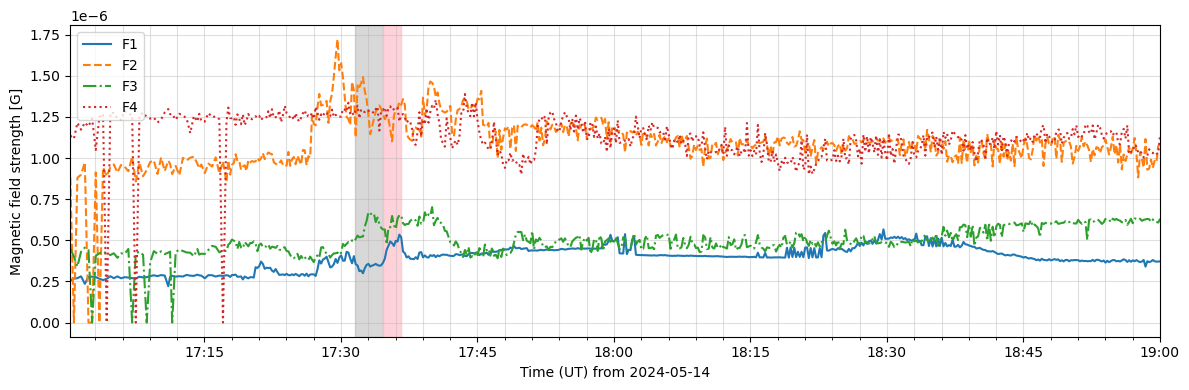

In [204]:
mean_speeds = [53.18, 200.43, 94.78, 247.40]
magnetic_field = []
magnetic_pressure = []

# Test ...

fig = plt.figure(figsize=[12,4])
ax = fig.add_subplot(111)

for i, (n_point, v) in enumerate(zip(densities, mean_speeds)):
    n = np.array(densities[n_point])
    B = v*np.sqrt(4*np.pi*n*mp_g.value)
    magnetic_field.append(B)
    p_m = (B**2)/(8*np.pi)
    magnetic_pressure.append(p_m)
    ax.plot(datetime_objects, B, ls=line_styles[i], label=f'F{i+1}')
# ax.set_yscale('log')
ax.legend(loc='upper left')
ax.set_ylabel('Magnetic field strength [G]')
ax.grid(which='both', alpha=0.4)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
ax.set_xlim(left=datetime_objects[0], right=datetime_objects[-1])
ax.set_xlabel(f"Time (UT) from {str(dens_map.date).split('T')[0]}")

time1 = pd.Timestamp('2024-05-14T17:31:35')
time2 = pd.Timestamp('2024-05-14T17:34:35')
ax.axvspan(time1, time2, color='gray', alpha=0.3)

time1 = pd.Timestamp('2024-05-14T17:34:35')
time2 = pd.Timestamp('2024-05-14T17:36:35')
ax.axvspan(time1, time2, color='pink', alpha=0.7)

fig.tight_layout()
plt.show()

In [169]:
print(mp_g)
print(f'{np.nanmean(n):e}')
print(v)

B = v*np.sqrt(4*np.pi*np.nanmean(n)*mp_g.value) / 1e-5
print(B)

1.67262192369e-24 g
1.014385e+06
247.4
0.11423651133524883


$\mu_0 = 4\pi \times 10^{-7} \, \text{Gauss} \cdot \text{cm} / \text{g} \cdot \text{s}^2$

In [195]:
# # Test: Another way to est. Bmag

# mean_speeds = [53.18, 200.43, 94.78, 247.40]
# mu = 4*np.pi*10**-7

# fig = plt.figure(figsize=[12,4])
# ax = fig.add_subplot(111)

# for i, (n_point, v) in enumerate(zip(densities, mean_speeds)):
#     n = np.array(densities[n_point])
#     B = v*np.sqrt(mu*n*mp_g.value)
#     p_m = (B**2)/(8*np.pi)
#     ax.plot(datetime_objects, B, ls=line_styles[i], label=f'F{i+1}')
# # ax.set_yscale('log')
# ax.legend(loc='upper left')
# ax.set_ylabel('Magnetic field strength [G]')
# ax.grid(which='both', alpha=0.4)
# ax.xaxis_date()
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
# ax.set_xlim(left=datetime_objects[0], right=datetime_objects[-1])
# ax.set_xlabel(f"Time (UT) from {str(dens_map.date).split('T')[0]}")

# time1 = pd.Timestamp('2024-05-14T17:31:35')
# time2 = pd.Timestamp('2024-05-14T17:34:35')
# ax.axvspan(time1, time2, color='gray', alpha=0.3)

# time1 = pd.Timestamp('2024-05-14T17:34:35')
# time2 = pd.Timestamp('2024-05-14T17:36:35')
# ax.axvspan(time1, time2, color='pink', alpha=0.7)

# fig.tight_layout()
# plt.show()

In [194]:
# # Test ...

# mean_speeds = [53.18, 200.43, 94.78, 247.40]
# mu = 4*np.pi*10**-7

# fig = plt.figure(figsize=[12,4])
# ax = fig.add_subplot(111)

# for i, (n_point, v) in enumerate(zip(densities, mean_speeds)):
#     n = np.array(densities[n_point])
#     B = v*np.sqrt(mu*n*mp_g.value)
#     p_m = (B**2)/(8*np.pi)
#     ax.plot(datetime_objects, p_m, ls=line_styles[i], label=f'F{i+1}')
# ax.set_yscale('log')
# ax.legend(loc='upper left')
# ax.set_ylabel('Magnetic pressure [G]')
# ax.grid(which='both', alpha=0.4)
# ax.xaxis_date()
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
# ax.set_xlim(left=datetime_objects[0], right=datetime_objects[-1])
# ax.set_xlabel(f"Time (UT) from {str(dens_map.date).split('T')[0]}")

# time1 = pd.Timestamp('2024-05-14T17:31:35')
# time2 = pd.Timestamp('2024-05-14T17:34:35')
# ax.axvspan(time1, time2, color='gray', alpha=0.3)

# time1 = pd.Timestamp('2024-05-14T17:34:35')
# time2 = pd.Timestamp('2024-05-14T17:36:35')
# ax.axvspan(time1, time2, color='pink', alpha=0.7)

# fig.tight_layout()
# plt.show()

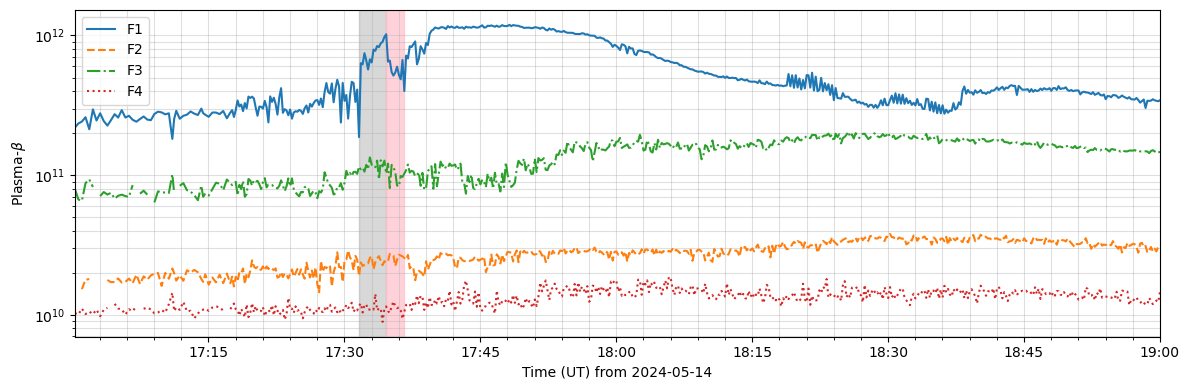

In [200]:
# Test: plasma-beta

plasma_beta = []

fig = plt.figure(figsize=[12,4])
ax = fig.add_subplot(111)

for i in range(len(thermal_pressure)):
    pth  = thermal_pressure[i]
    pm   = magnetic_pressure[i]
    beta = pth / pm
    plasma_beta.append(beta)
    ax.plot(datetime_objects, beta, ls=line_styles[i], label=f'F{i+1}')
ax.set_yscale('log')
ax.legend(loc='upper left')
ax.set_ylabel(r'Plasma-$\beta$')
ax.grid(which='both', alpha=0.4)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
ax.set_xlim(left=datetime_objects[0], right=datetime_objects[-1])
ax.set_xlabel(f"Time (UT) from {str(dens_map.date).split('T')[0]}")

time1 = pd.Timestamp('2024-05-14T17:31:35')
time2 = pd.Timestamp('2024-05-14T17:34:35')
ax.axvspan(time1, time2, color='gray', alpha=0.3)

time1 = pd.Timestamp('2024-05-14T17:34:35')
time2 = pd.Timestamp('2024-05-14T17:36:35')
ax.axvspan(time1, time2, color='pink', alpha=0.7)

fig.tight_layout()
plt.show()

## All new plots together

In [205]:
len(plasma_beta), len(thermal_pressure), len(magnetic_pressure), len(sound_speed), len(magnetic_field)

(4, 4, 4, 4, 4)

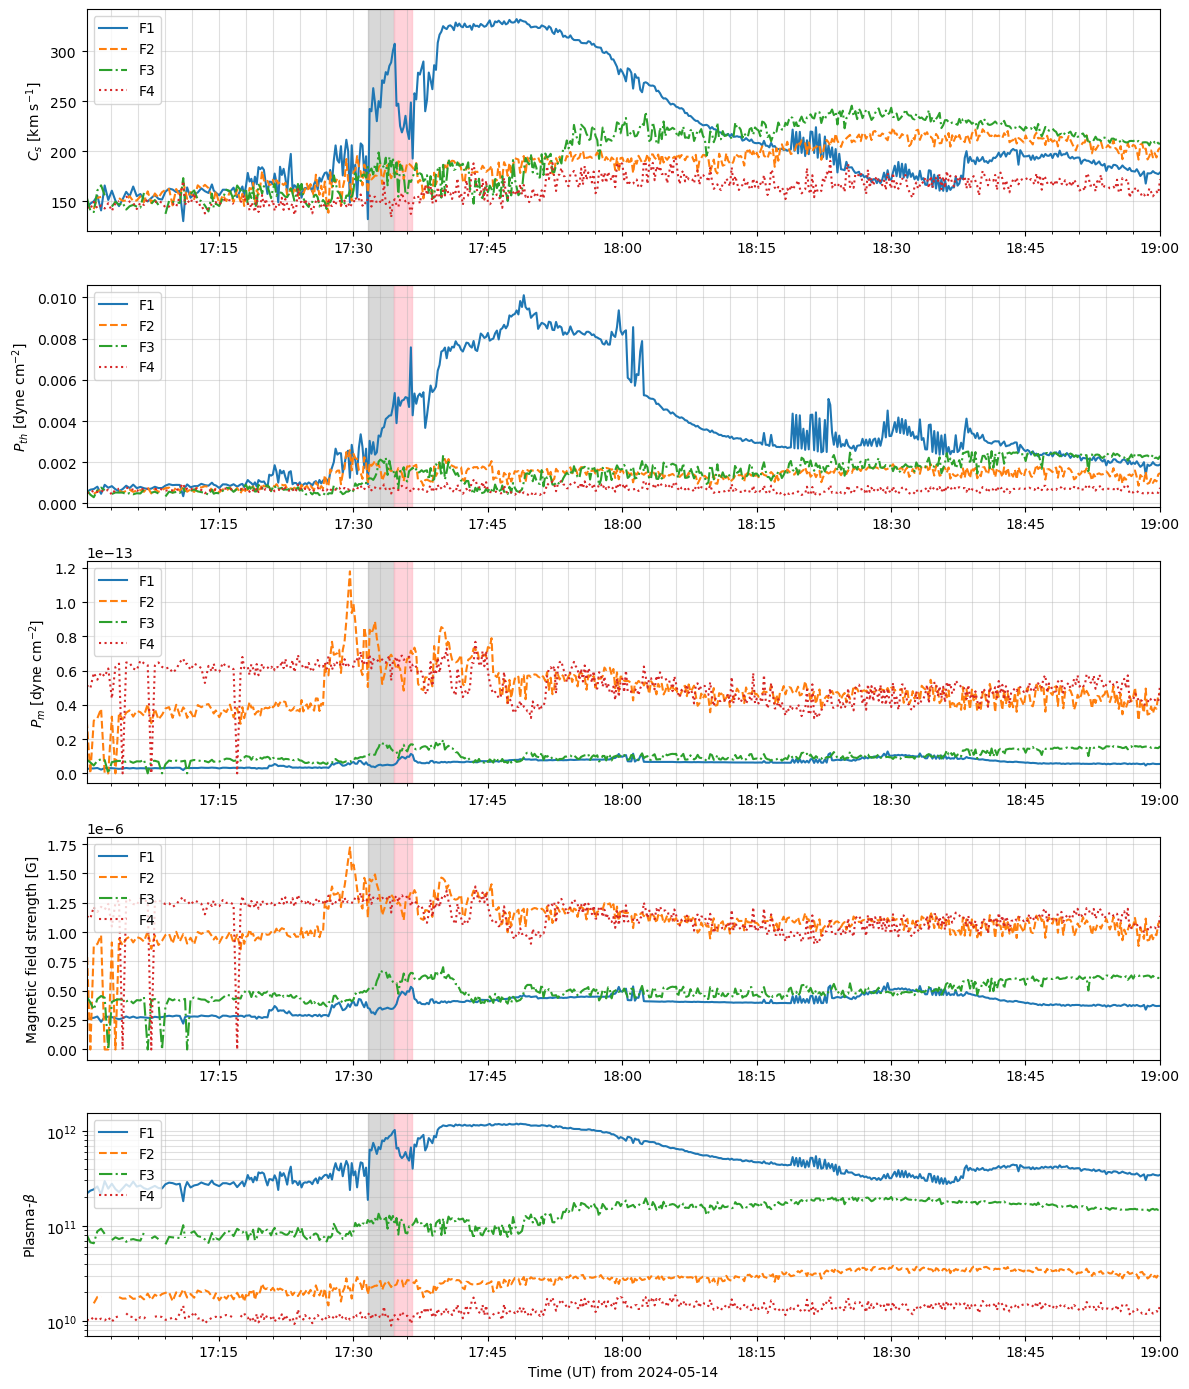

In [216]:
fig = plt.figure(figsize=[12,14])

ax = fig.add_subplot(511)
for i in range(4):
    ax.plot(datetime_objects, sound_speed[i], ls=line_styles[i], label=f'F{i+1}')
ax.legend(loc='upper left')
ax.set_ylabel(r'$C_s$ [km s$^{-1}$]')
ax.grid(which='both', alpha=0.4)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
ax.set_xlim(left=datetime_objects[0], right=datetime_objects[-1])
ax.axvspan(pd.Timestamp('2024-05-14T17:31:35'), pd.Timestamp('2024-05-14T17:34:35'), color='gray', alpha=0.3)
ax.axvspan(pd.Timestamp('2024-05-14T17:34:35'), pd.Timestamp('2024-05-14T17:36:35'), color='pink', alpha=0.7)

ax = fig.add_subplot(512)
for i in range(4):
    ax.plot(datetime_objects, thermal_pressure[i], ls=line_styles[i], label=f'F{i+1}')
# ax.set_yscale('log')
ax.legend(loc='upper left')
ax.set_ylabel(r'$P_{th}$ [dyne cm$^{-2}$]')
ax.grid(which='both', alpha=0.4)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
ax.set_xlim(left=datetime_objects[0], right=datetime_objects[-1])
ax.axvspan(pd.Timestamp('2024-05-14T17:31:35'), pd.Timestamp('2024-05-14T17:34:35'), color='gray', alpha=0.3)
ax.axvspan(pd.Timestamp('2024-05-14T17:34:35'), pd.Timestamp('2024-05-14T17:36:35'), color='pink', alpha=0.7)

ax = fig.add_subplot(513)
for i in range(4):
    ax.plot(datetime_objects, magnetic_pressure[i], ls=line_styles[i], label=f'F{i+1}')
# ax.set_yscale('log')
ax.legend(loc='upper left')
ax.set_ylabel(r'$P_m$ [dyne cm$^{-2}$]')
ax.grid(which='both', alpha=0.4)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
ax.set_xlim(left=datetime_objects[0], right=datetime_objects[-1])
ax.axvspan(pd.Timestamp('2024-05-14T17:31:35'), pd.Timestamp('2024-05-14T17:34:35'), color='gray', alpha=0.3)
ax.axvspan(pd.Timestamp('2024-05-14T17:34:35'), pd.Timestamp('2024-05-14T17:36:35'), color='pink', alpha=0.7)

ax = fig.add_subplot(514)
for i in range(4):
    ax.plot(datetime_objects, magnetic_field[i], ls=line_styles[i], label=f'F{i+1}')
ax.legend(loc='upper left')
ax.set_ylabel('Magnetic field strength [G]')
ax.grid(which='both', alpha=0.4)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
ax.set_xlim(left=datetime_objects[0], right=datetime_objects[-1])
ax.axvspan(pd.Timestamp('2024-05-14T17:31:35'), pd.Timestamp('2024-05-14T17:34:35'), color='gray', alpha=0.3)
ax.axvspan(pd.Timestamp('2024-05-14T17:34:35'), pd.Timestamp('2024-05-14T17:36:35'), color='pink', alpha=0.7)

ax = fig.add_subplot(515)
for i in range(4):
    ax.plot(datetime_objects, plasma_beta[i], ls=line_styles[i], label=f'F{i+1}')
ax.set_yscale('log')
ax.legend(loc='upper left')
ax.set_ylabel(r'Plasma-$\beta$')
ax.grid(which='both', alpha=0.4)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
ax.set_xlim(left=datetime_objects[0], right=datetime_objects[-1])
ax.axvspan(pd.Timestamp('2024-05-14T17:31:35'), pd.Timestamp('2024-05-14T17:34:35'), color='gray', alpha=0.3)
ax.axvspan(pd.Timestamp('2024-05-14T17:34:35'), pd.Timestamp('2024-05-14T17:36:35'), color='pink', alpha=0.7)
ax.set_xlabel(f"Time (UT) from {str(dens_map.date).split('T')[0]}")

fig.tight_layout()
# fig.savefig(f'{data_dir}/plasma_param.pdf', format='pdf', bbox_inches='tight')
plt.show()

# Troubleshooting

In [228]:
mp = const.m_p*u.kg
mp_g = mp.to(u.g)
print(f'mp_g: {mp_g:.2e}')

kB = const.Boltzmann * u.J/u.K
k_erg = kB.to(u.erg/u.K)
print(f'k_erg: {k_erg:.2e}')

n = 1e6
T = 1e6
v = 1e3

gamma = 5/3     # Adiabatic index
mu    = 1.27    # Mean molecular weight in the corona

C_s     = np.sqrt((gamma * k_erg.value * T) / (mu * mp_g.value))  # cm/s
C_s_kms = C_s / 1e5                                    # Convert to km/s
print(f'Cs: {C_s_kms:.2f} km/s')

B    = v*np.sqrt(4*np.pi*n*mp_g.value)
p_th = 2*n*k_erg.value*T
p_m  = (B**2)/(8*np.pi)
beta = p_th / p_m

print(f'B: {B:.2e} G')
print(f'P_th: {p_th:.2e} dyne/cm2')
print(f'P_m: {p_m:.2e} dyne/cm2')
print(f'beta: {beta:.2f}')

mp_g: 1.67e-24 g
k_erg: 1.38e-16 erg / K
Cs: 104.08 km/s
B: 4.58e-06 G
P_th: 2.76e-04 dyne/cm2
P_m: 8.36e-13 dyne/cm2
beta: 330175990.27


In [235]:
v * np.sqrt(n * mp_g.value) * 1e7

12.932988532006048

In [236]:
(v * np.sqrt(n * mp_g.value)) / 1e-7

12.93298853200605

In [243]:
v * np.sqrt(4*np.pi * n * mp_g.value) * 1e5

0.4584625065454199

In [244]:
v * np.sqrt(mu * n * mp_g.value) * 1e5

0.14574737881300986

In [237]:
4*np.pi

12.566370614359172

In [241]:
(1*u.km).to(u.cm)

<Quantity 100000. cm>

In [242]:
mp_g.value

1.67262192369e-24